In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Cleaned Dataset
df = pd.read_csv("../data/Affordable_Housing_Cleaned.csv")
print(f"Shape: {df.shape}")
display(df.head())

Shape: (2197, 13)


,Year,Town Code,Town,Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable,Town_Encoded,Calculated_Pct,Period
0,2023,1,Andover,1324,24,1,26,0,51,3.85,0,3.85,2020-2023
1,2022,1,Andover,1317,24,1,27,0,52,3.95,0,3.95,2020-2023
2,2021,1,Andover,1317,24,1,29,0,54,4.10,0,4.10,2020-2023
3,2020,1,Andover,1317,18,1,32,0,51,3.87,0,3.87,2020-2023
4,2019,1,Andover,1317,18,1,29,0,48,3.64,0,3.64,2016-2019


#### 4.1 DISTRIBUTION ANALYSIS

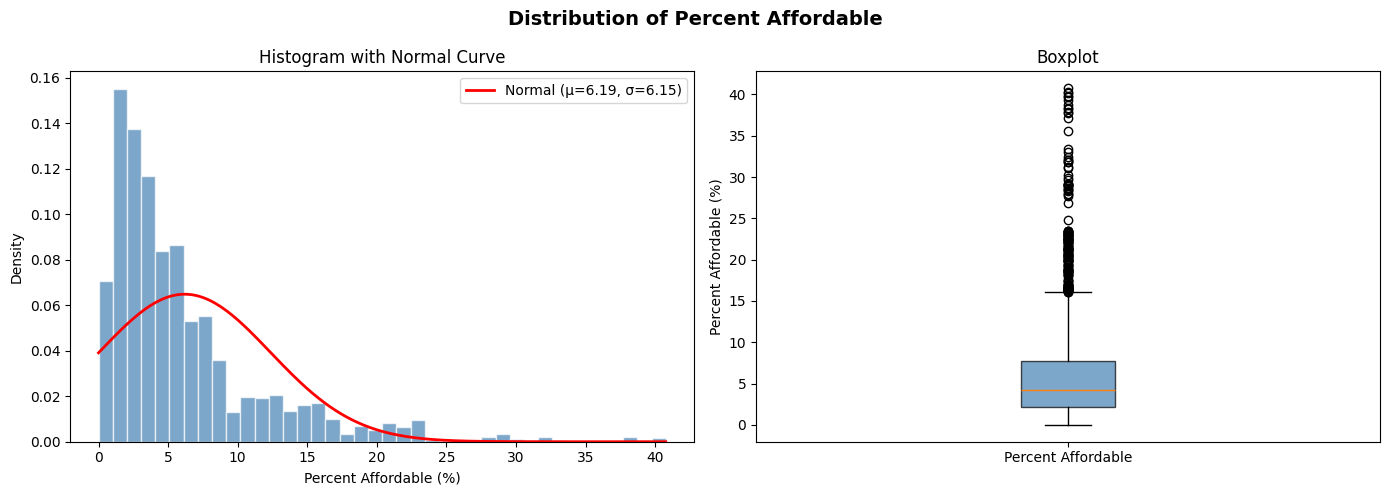

Mean:     6.19%
Median:   4.22%
Std Dev:  6.15%
Skewness: 2.2283
Kurtosis: 6.3309


In [3]:
# Distribution of Percent Affordable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Distribution of Percent Affordable", fontsize=14, fontweight='bold')

# Histogram with KDE
axes[0].hist(df['Percent Affordable'], bins=40, color='steelblue', edgecolor='white', density=True, alpha=0.7)
mu, std = df['Percent Affordable'].mean(), df['Percent Affordable'].std()
x = np.linspace(df['Percent Affordable'].min(), df['Percent Affordable'].max(), 200)
axes[0].plot(x, stats.norm.pdf(x, mu, std), color='red', linewidth=2, label=f'Normal (μ={mu:.2f}, σ={std:.2f})')
axes[0].set_xlabel("Percent Affordable (%)")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram with Normal Curve")
axes[0].legend()

# Boxplot
axes[1].boxplot(df['Percent Affordable'].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.7))
axes[1].set_ylabel("Percent Affordable (%)")
axes[1].set_title("Boxplot")
axes[1].set_xticks([1])
axes[1].set_xticklabels(['Percent Affordable'])

plt.tight_layout()
plt.savefig("../data/4_1_distribution.png", dpi=150, bbox_inches='tight')
plt.show()

# Summary Stats
print(f"Mean:     {mu:.2f}%")
print(f"Median:   {df['Percent Affordable'].median():.2f}%")
print(f"Std Dev:  {std:.2f}%")
print(f"Skewness: {df['Percent Affordable'].skew():.4f}")
print(f"Kurtosis: {df['Percent Affordable'].kurt():.4f}")

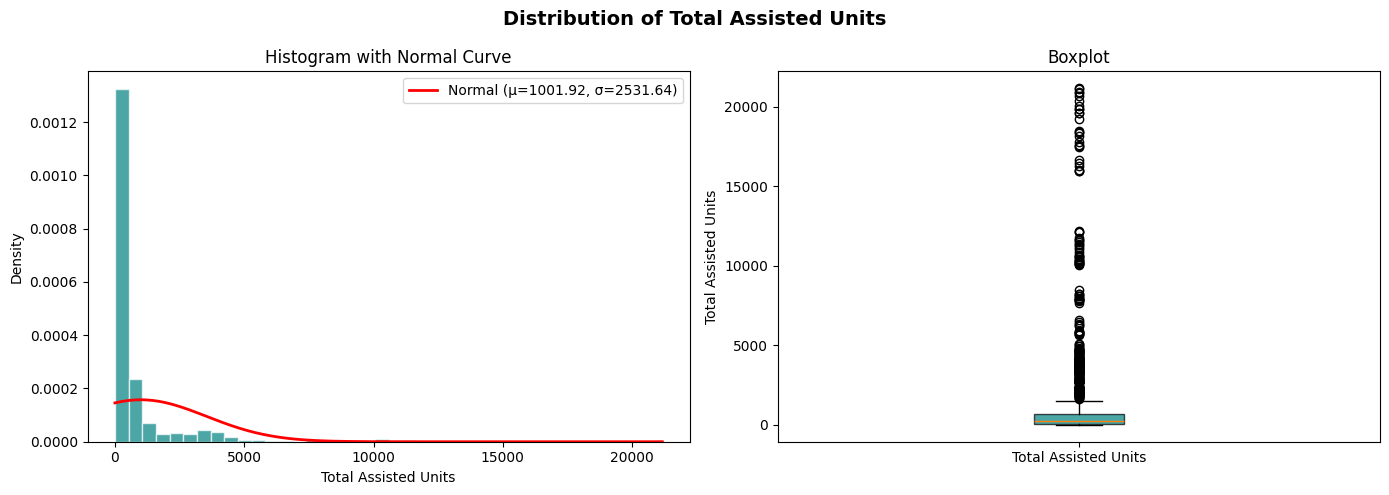

In [4]:
# Distribution of Total Assisted Units
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Distribution of Total Assisted Units", fontsize=14, fontweight='bold')

axes[0].hist(df['Total Assisted Units'], bins=40, color='teal', edgecolor='white', density=True, alpha=0.7)
mu2, std2 = df['Total Assisted Units'].mean(), df['Total Assisted Units'].std()
x2 = np.linspace(df['Total Assisted Units'].min(), df['Total Assisted Units'].max(), 200)
axes[0].plot(x2, stats.norm.pdf(x2, mu2, std2), color='red', linewidth=2, label=f'Normal (μ={mu2:.2f}, σ={std2:.2f})')
axes[0].set_xlabel("Total Assisted Units")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram with Normal Curve")
axes[0].legend()

axes[1].boxplot(df['Total Assisted Units'].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='teal', alpha=0.7))
axes[1].set_ylabel("Total Assisted Units")
axes[1].set_title("Boxplot")
axes[1].set_xticks([1])
axes[1].set_xticklabels(['Total Assisted Units'])

plt.tight_layout()
plt.savefig("../data/4_1_distribution_assisted.png", dpi=150, bbox_inches='tight')
plt.show()


#### 4.2 TREND ANALYSIS OVER TIME

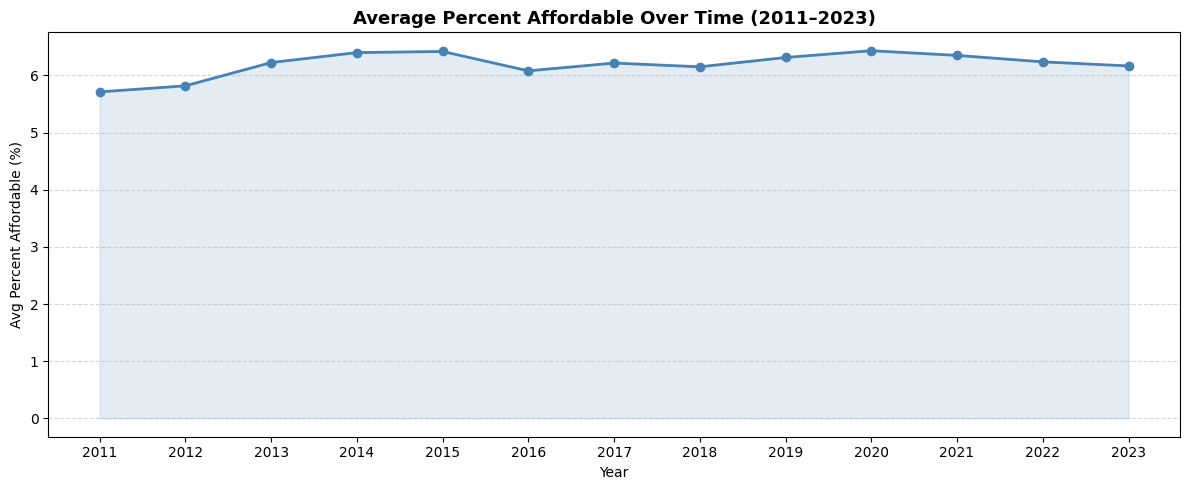

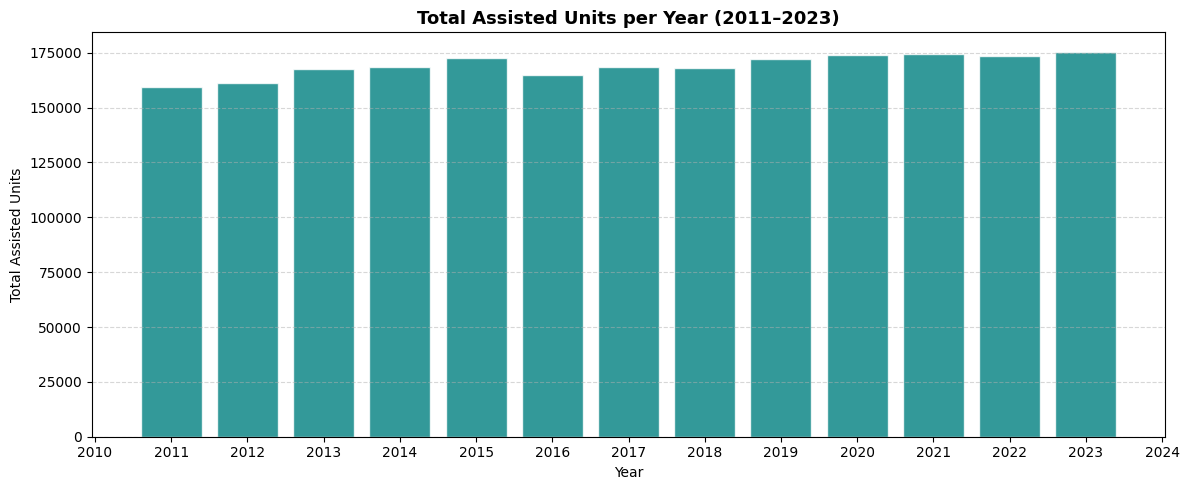

In [5]:
# Average Percent Affordable per Year
yearly = df.groupby('Year')['Percent Affordable'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(yearly['Year'], yearly['Percent Affordable'], marker='o', color='steelblue', linewidth=2, markersize=6)
ax.fill_between(yearly['Year'], yearly['Percent Affordable'], alpha=0.15, color='steelblue')
ax.set_title("Average Percent Affordable Over Time (2011–2023)", fontsize=13, fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Avg Percent Affordable (%)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("../data/4_2_trend_yearly.png", dpi=150, bbox_inches='tight')
plt.show()


# Total Assisted Units per Year
yearly_units = df.groupby('Year')['Total Assisted Units'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(yearly_units['Year'], yearly_units['Total Assisted Units'], color='teal', edgecolor='white', alpha=0.8)
ax.set_title("Total Assisted Units per Year (2011–2023)", fontsize=13, fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Total Assisted Units")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("../data/4_2_trend_units.png", dpi=150, bbox_inches='tight')
plt.show()

#### 4.3 TOP & BOTTOM TOWNS

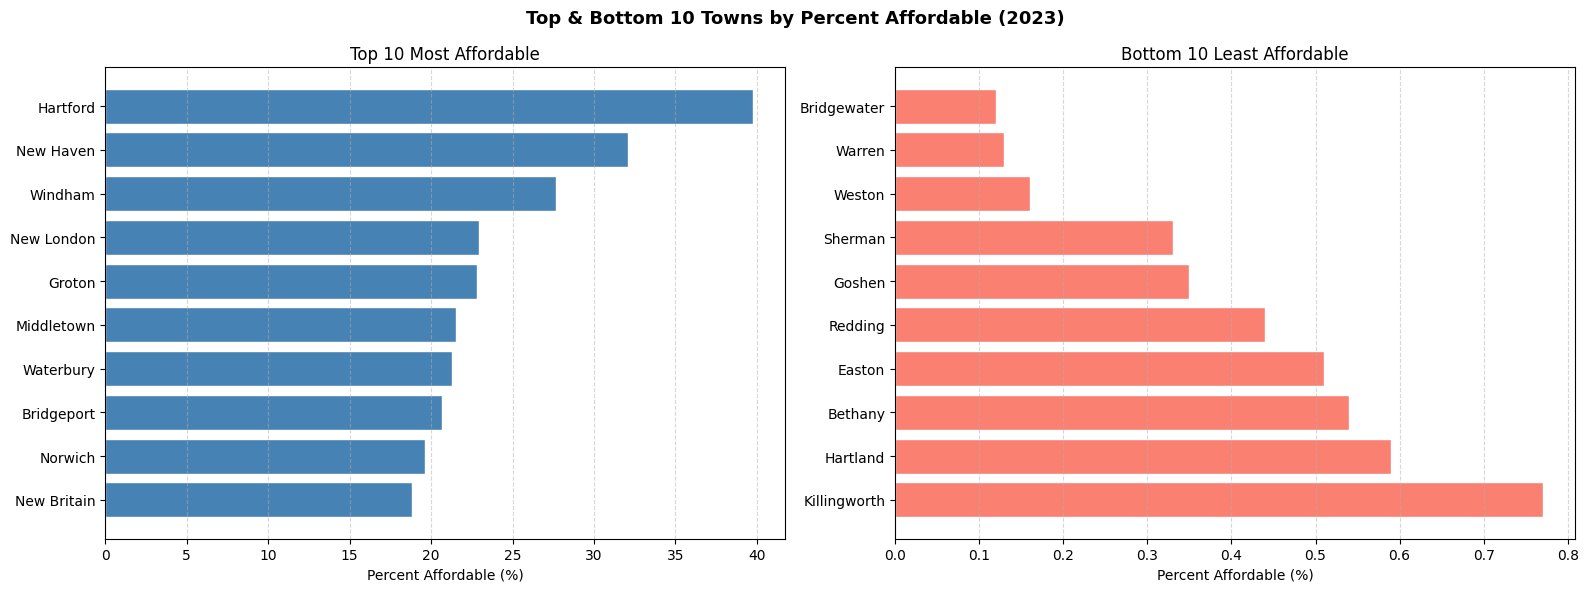

In [6]:
# Top 10 & Bottom 10 Towns by Avg Percent Affordable (latest year)
latest = df[df['Year'] == df['Year'].max()]
town_avg = latest.groupby('Town')['Percent Affordable'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f"Top & Bottom 10 Towns by Percent Affordable ({df['Year'].max()})", fontsize=13, fontweight='bold')

top10 = town_avg.head(10)
axes[0].barh(top10.index[::-1], top10.values[::-1], color='steelblue', edgecolor='white')
axes[0].set_title("Top 10 Most Affordable")
axes[0].set_xlabel("Percent Affordable (%)")
axes[0].grid(axis='x', linestyle='--', alpha=0.5)

bot10 = town_avg.tail(10)
axes[1].barh(bot10.index, bot10.values, color='salmon', edgecolor='white')
axes[1].set_title("Bottom 10 Least Affordable")
axes[1].set_xlabel("Percent Affordable (%)")
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("../data/4_3_top_bottom_towns.png", dpi=150, bbox_inches='tight')
plt.show()

#### 4.4 CORRELATION ANALYSIS

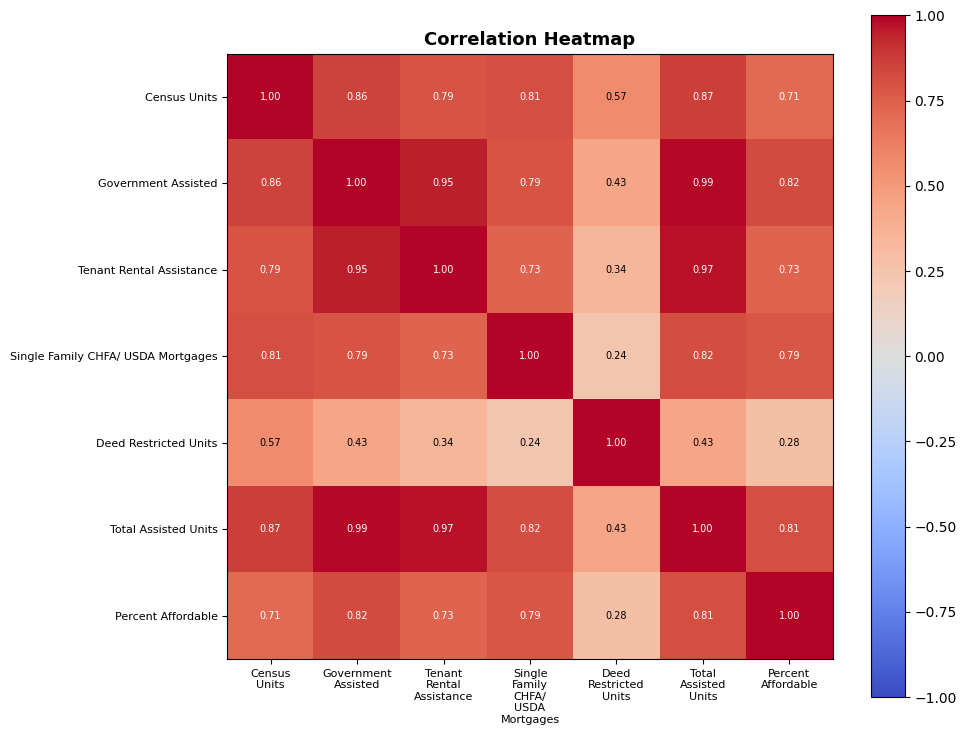

In [7]:
# Correlation Heatmap
num_cols = ['Census Units', 'Government Assisted', 'Tenant Rental Assistance',
            'Single Family CHFA/ USDA Mortgages', 'Deed Restricted Units',
            'Total Assisted Units', 'Percent Affordable']
corr = df[num_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, ax=ax)
ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels([c.replace(' ', '\n') for c in num_cols], fontsize=8)
ax.set_yticklabels(num_cols, fontsize=8)
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', fontsize=7,
                color='white' if abs(corr.iloc[i, j]) > 0.6 else 'black')
ax.set_title("Correlation Heatmap", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("../data/4_4_correlation_heatmap.png", dpi=150, bbox_inches='tight')
plt.show()

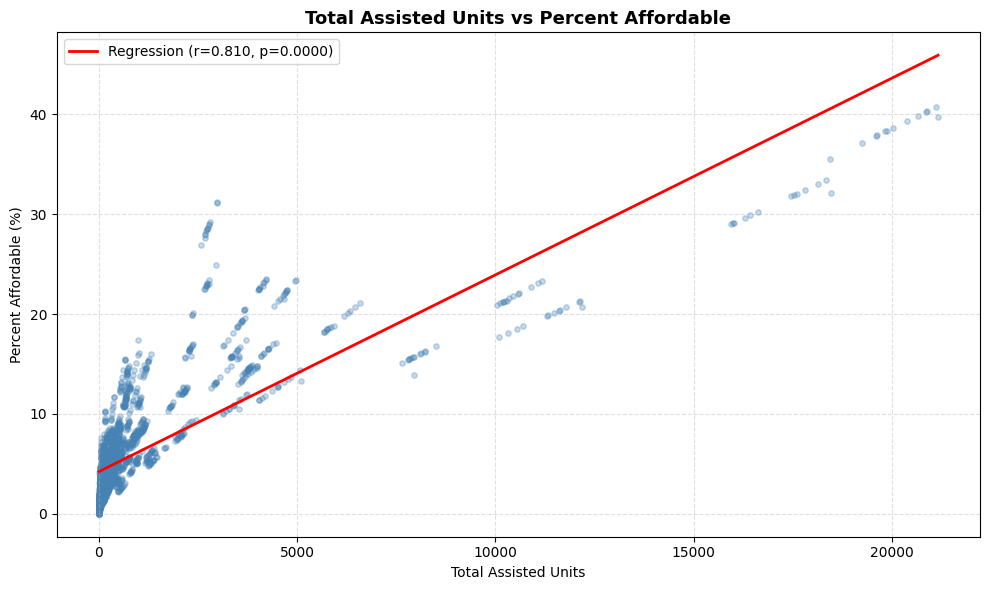

Pearson r:   0.8101
R-squared:   0.6563
p-value:     0.000000


In [8]:
# Scatter: Total Assisted Units vs Percent Affordable
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Total Assisted Units'], df['Percent Affordable'], alpha=0.3, color='steelblue', s=15)
m, b, r, p, se = stats.linregress(df['Total Assisted Units'].dropna(), df['Percent Affordable'].dropna())
x_line = np.linspace(df['Total Assisted Units'].min(), df['Total Assisted Units'].max(), 200)
ax.plot(x_line, m * x_line + b, color='red', linewidth=2, label=f'Regression (r={r:.3f}, p={p:.4f})')
ax.set_title("Total Assisted Units vs Percent Affordable", fontsize=13, fontweight='bold')
ax.set_xlabel("Total Assisted Units")
ax.set_ylabel("Percent Affordable (%)")
ax.legend()
ax.grid(linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("../data/4_4_scatter_regression.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"Pearson r:   {r:.4f}")
print(f"R-squared:   {r**2:.4f}")
print(f"p-value:     {p:.6f}")


#### 4.5 STATISTICAL ANALYSIS

In [9]:
# Normality Test (Shapiro-Wilk on sample)
sample = df['Percent Affordable'].dropna().sample(500, random_state=42)
stat, p_val = stats.shapiro(sample)
print(f"Shapiro-Wilk Test — Statistic: {stat:.4f}, p-value: {p_val:.6f}")
print("Normal distribution:" , "Yes" if p_val > 0.05 else "No (p < 0.05)")


Shapiro-Wilk Test — Statistic: 0.7953, p-value: 0.000000
Normal distribution: No (p < 0.05)


In [10]:
# Period-wise Comparison (ANOVA)
groups = [grp['Percent Affordable'].dropna().values for _, grp in df.groupby('Period')]
f_stat, p_anova = stats.f_oneway(*groups)
print(f"ANOVA — F-statistic: {f_stat:.4f}, p-value: {p_anova:.6f}")
print("Significant difference across periods:", "Yes" if p_anova < 0.05 else "No")

ANOVA — F-statistic: 0.1640, p-value: 0.848791
Significant difference across periods: No


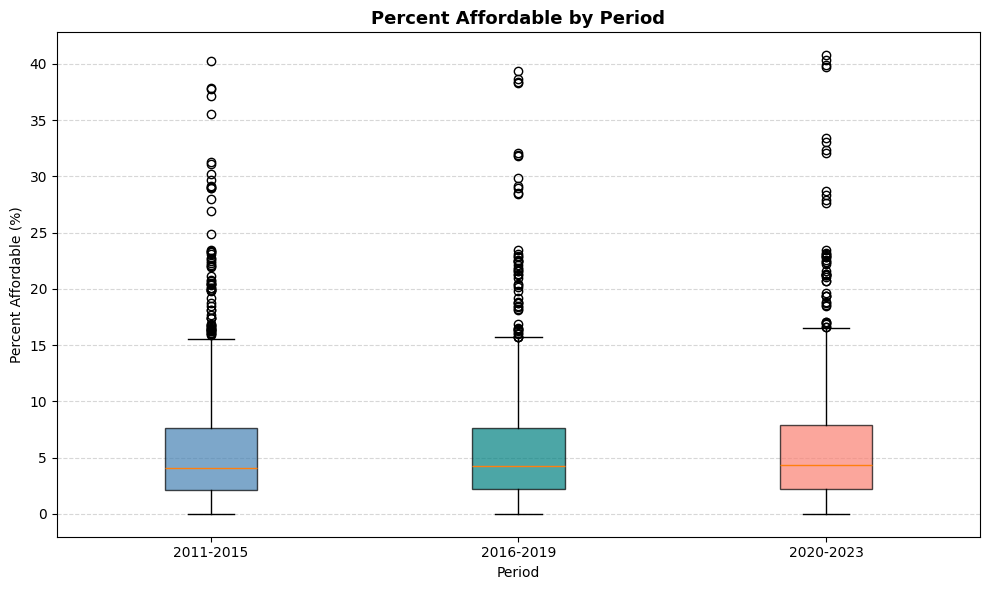

In [11]:
# Boxplot: Percent Affordable by Period
fig, ax = plt.subplots(figsize=(10, 6))
periods = df['Period'].dropna().unique()
period_data = [df[df['Period'] == p]['Percent Affordable'].dropna().values for p in sorted(periods)]
bp = ax.boxplot(period_data, patch_artist=True, labels=sorted(periods))
colors = ['steelblue', 'teal', 'salmon']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax.set_title("Percent Affordable by Period", fontsize=13, fontweight='bold')
ax.set_xlabel("Period")
ax.set_ylabel("Percent Affordable (%)")
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("../data/4_5_boxplot_period.png", dpi=150, bbox_inches='tight')
plt.show()


In [12]:
# Confidence Interval for Mean Percent Affordable
n = len(df['Percent Affordable'].dropna())
mean = df['Percent Affordable'].mean()
se = stats.sem(df['Percent Affordable'].dropna())
ci = stats.t.interval(0.95, df=n-1, loc=mean, scale=se)
print(f"95% Confidence Interval for Mean Percent Affordable: ({ci[0]:.4f}, {ci[1]:.4f})")

95% Confidence Interval for Mean Percent Affordable: (5.9372, 6.4522)


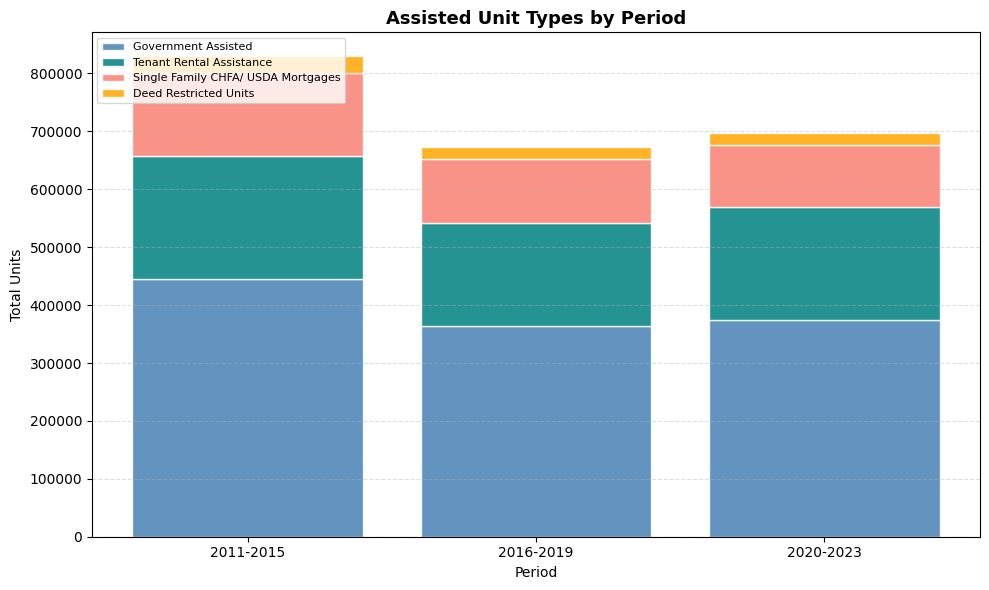

In [13]:
# Stacked Bar: Assisted Unit Types per Period
unit_cols = ['Government Assisted', 'Tenant Rental Assistance',
             'Single Family CHFA/ USDA Mortgages', 'Deed Restricted Units']
period_units = df.groupby('Period')[unit_cols].sum()

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(period_units))
colors = ['steelblue', 'teal', 'salmon', 'orange']
for col, color in zip(unit_cols, colors):
    ax.bar(period_units.index.astype(str), period_units[col], bottom=bottom,
           label=col, color=color, edgecolor='white', alpha=0.85)
    bottom += period_units[col].values
ax.set_title("Assisted Unit Types by Period", fontsize=13, fontweight='bold')
ax.set_xlabel("Period")
ax.set_ylabel("Total Units")
ax.legend(loc='upper left', fontsize=8)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("../data/4_5_stacked_bar_period.png", dpi=150, bbox_inches='tight')
plt.show()